In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_excel("dataset2.xlsx")
df

,Time,Count
0,08:00:00,6
1,08:15:00,56
2,08:30:00,3
3,08:45:00,7
4,09:00:00,3
5,09:15:00,12
6,09:30:00,23
7,09:45:00,34
8,10:00:00,45
9,10:15:00,56


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    31 non-null     object
 1   Count   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [4]:
def get_time(time_str):
    time_str = str(time_str)
    time_format = "%H:%M:%S"
    current_date = datetime.now().date()
    time_datetime = datetime.strptime(time_str, time_format)
    new_date = current_date.replace(day=19, month=5, year=2023)
    new_datetime = datetime.combine(new_date, time_datetime.time())
    return new_datetime

In [5]:
df['Time'] = df['Time'].apply(get_time)
df

,Time,Count
0,2023-05-19 08:00:00,6
1,2023-05-19 08:15:00,56
2,2023-05-19 08:30:00,3
3,2023-05-19 08:45:00,7
4,2023-05-19 09:00:00,3
5,2023-05-19 09:15:00,12
6,2023-05-19 09:30:00,23
7,2023-05-19 09:45:00,34
8,2023-05-19 10:00:00,45
9,2023-05-19 10:15:00,56


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    31 non-null     datetime64[ns]
 1   Count   31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 628.0 bytes


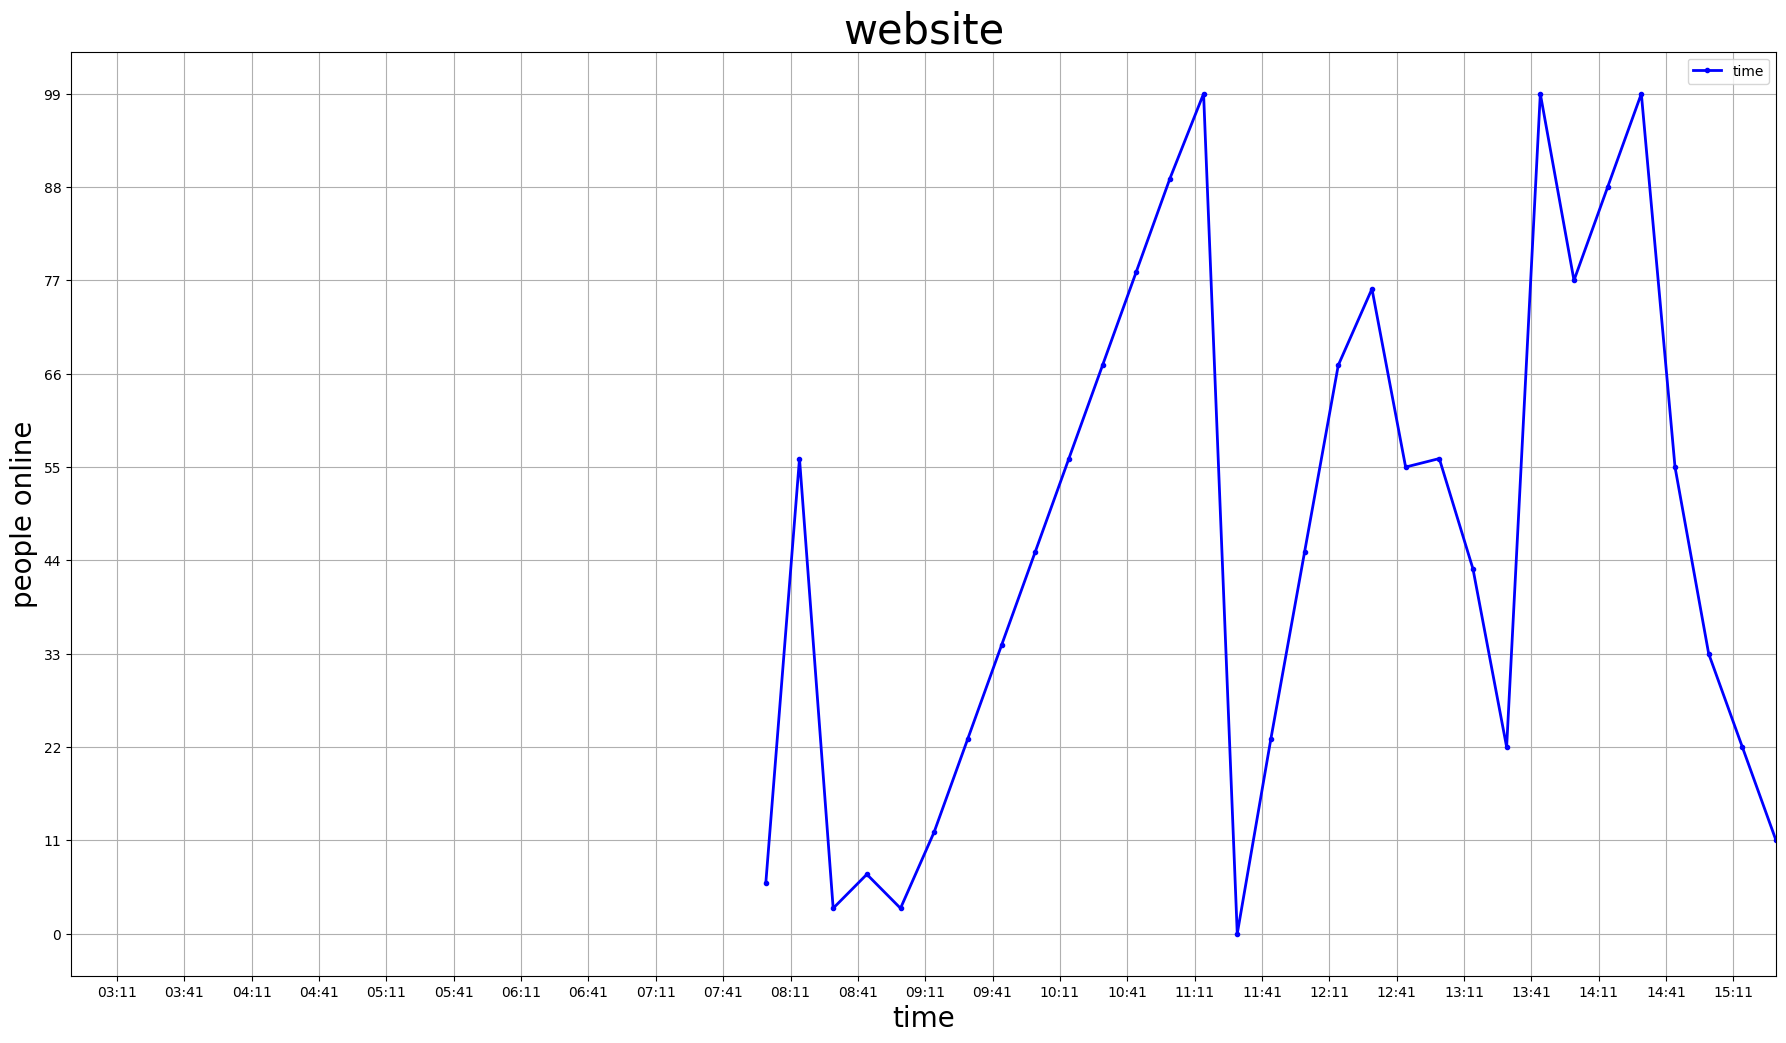

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['Time'] = pd.to_datetime(df['Time'])


plt.figure(figsize=(22, 12))  

plt.plot(df['Time'], df['Count'], color='blue', linestyle='-', linewidth=2, marker='o', markersize=3, label='Số lượng')  

plt.grid(True)  


ax = plt.gca()  
ax.set_xlim(df['Time'].iloc[0].replace(hour=2, minute=50, second=30), df['Time'].iloc[-1])
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  


num_ticks = 10  
max_count = df['Count'].max()  
step = max_count // (num_ticks - 1)  
y_ticks = [i * step for i in range(num_ticks)]  
plt.yticks(y_ticks)  

plt.ylabel('people online', fontsize=20)  
plt.xlabel('time', fontsize=20)  


plt.title('website', fontsize=30) 
plt.legend(['time'])  

plt.show()  
